## EPA's Toxic Release Data

This code loads EPA Toxic Release Data for 2011, extracts specific columns, and then combines all the data into one Pandas DataFrame. I then load health disease data which has associated death rates and specifically look at cancer, heart disease, and influenza data. I then group the toxic release data by state and extract production waste produced by state in pounds. I then created scatter plots to see if there was any visual correlation between toxic production waste and the selected diseases. Finally, I upload the toxic release data (grouped by state) to a sqlite database. 

In [1]:
import pandas as pd
from sqlalchemy import create_engine
from api_keys import gkey
import gmaps
import matplotlib.pyplot as plt

# Load first data set 

ToxRelData = pd.read_csv('toxic-release-inventory/TRI_2011_US.csv')
ToxRelData = ToxRelData.iloc[:,[0,3,5,6,7,8,11,12,29,36,38,103,107]]
ToxRelData.head()

/Users/austinlittle/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (10,23,24,25,26,108) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,YEAR,FACILITY_NAME,CITY,COUNTY,ST,ZIP,LATITUDE,LONGITUDE,CHEMICAL,CARCINOGEN,UNIT_OF_MEASURE,PROD._WASTE_(8.1_THRU_8.7),PARENT_COMPANY_NAME
0,2011,J H CAMPBELL GENERATING PLANT,WEST OLIVE,OTTAWA,MI,49460,42.912085,-86.203542,CHROMIUM COMPOUNDS(EXCEPT CHROMITE ORE MINED I...,NO,Pounds,2.568860e+04,CMS ENERGY
1,2011,HERAEUS PRECIOUS METALS NA LLC,SANTA FE SPRINGS,LOS ANGELES,CA,90670,33.887930,-118.046090,"SULFURIC ACID (1994 AND AFTER ACID AEROSOLS"" O...",NO,Pounds,3.629180e+05,HERAEUS INC
2,2011,BASF CORP - HANNIBAL SITE,PALMYRA,MARION,MO,63461,39.834118,-91.436791,TOLUENE,NO,Pounds,2.645132e+06,BASF CORP
3,2011,WEYERHAEUSER NR CO BRUCE FACILITY,BRUCE,CALHOUN,MS,38915,33.986300,-89.346100,DIOXIN AND DIOXIN-LIKE COMPOUNDS,NO,Grams,6.633000e-01,WEYERHAEUSER CO
4,2011,CARGILL INC,DALTON,WHITFIELD,GA,30721,34.708889,-84.957778,TOLUENE,NO,Pounds,0.000000e+00,CARGILL INC


In [2]:
# Must Map state abbreviations to full state name

# Create dict for abbreviations to state names
state_ab = {'AL':'Alabama', 'AK':'Alaska','AZ':'Arizona','AR':'Arkansas','CA':'California','CO':'Colorado',
            'CT':'Connecticut','DE':'Deleware','FL':'Florida','GA':'Georgia','HI':'Hawaii','ID':'Idaho',
            'IL':'Illinois','IN':'Indiana','IA':'Iowa','KS':'Kansas','KY':'Kentucky','LA':'Louisiana',
            'ME':'Maine','MD':'Maryland','MA':'Massachusetts','MI':'Michigan','MN':'Minnesota','MS':'Mississippi',
            'MO':'Missouri','MT':'Montana','NE':'Nebraska','NV':'Nevada','NH':'New Hampshire','NJ':'New Jersey',
            'NM':'New Mexico','NY':'New York','NC':'North Carolina','ND':'North Dakota','OH':'Ohio','OK':'Oklahoma',
            'OR':'Oregon','PA':'Pennsylvania','RI':'Rhode Island','SC':'South Carolina','SD':'South Dakota',
            'TN':'Tennessee','TX':'Texas','UT':'Utah','VT':'Vermont','VA':'Virginia','WA':'Washington','WV':'West Virginia',
            'WI':'Wisconsin','WY':'Wyoming','AS':'American Somoa','DC':'District of Columbia','FM':'Federated States of Micronesia',
            'GU':'Guam','MH':'Marshall Islands','MP':'Northern Mariana Islands','PW':'Palau','PR':'Puerto Rico',
            'VI':'Virgin Islands'}

# Map State abbreviations to full state names
ToxRelData['State'] = ToxRelData['ST'].map(state_ab)

ToxRelData.drop(['ST'], axis=1)

,YEAR,FACILITY_NAME,CITY,COUNTY,ZIP,LATITUDE,LONGITUDE,CHEMICAL,CARCINOGEN,UNIT_OF_MEASURE,PROD._WASTE_(8.1_THRU_8.7),PARENT_COMPANY_NAME,State
0,2011,J H CAMPBELL GENERATING PLANT,WEST OLIVE,OTTAWA,49460,42.912085,-86.203542,CHROMIUM COMPOUNDS(EXCEPT CHROMITE ORE MINED I...,NO,Pounds,2.568860e+04,CMS ENERGY,Michigan
1,2011,HERAEUS PRECIOUS METALS NA LLC,SANTA FE SPRINGS,LOS ANGELES,90670,33.887930,-118.046090,"SULFURIC ACID (1994 AND AFTER ACID AEROSOLS"" O...",NO,Pounds,3.629180e+05,HERAEUS INC,California
2,2011,BASF CORP - HANNIBAL SITE,PALMYRA,MARION,63461,39.834118,-91.436791,TOLUENE,NO,Pounds,2.645132e+06,BASF CORP,Missouri
3,2011,WEYERHAEUSER NR CO BRUCE FACILITY,BRUCE,CALHOUN,38915,33.986300,-89.346100,DIOXIN AND DIOXIN-LIKE COMPOUNDS,NO,Grams,6.633000e-01,WEYERHAEUSER CO,Mississippi
4,2011,CARGILL INC,DALTON,WHITFIELD,30721,34.708889,-84.957778,TOLUENE,NO,Pounds,0.000000e+00,CARGILL INC,Georgia
5,2011,FORMOSA PLASTICS CORP TEXAS,POINT COMFORT,CALHOUN,77978,28.675300,-96.549500,ACETALDEHYDE,YES,Pounds,3.414000e+03,FORMOSA PLASTICS CORP USA,Texas
6,2011,AOC LLC,LAKELAND,POLK,33810,28.100831,-82.009719,ETHYLENE GLYCOL,NO,Pounds,2.550000e+02,ALPHA CORP,Florida
7,2011,IATAN GENERATING STATION,WESTON,PLATTE,64098,39.447569,-94.979125,AMMONIA,NO,Pounds,2.704480e+06,GREAT PLAINS ENERGY INC,Missouri
8,2011,IATAN GENERATING STATION,WESTON,PLATTE,64098,39.447569,-94.979125,HYDROGEN FLUORIDE,NO,Pounds,3.421000e+05,GREAT PLAINS ENERGY INC,Missouri
9,2011,GETZEN CO INC,ELKHORN,WALWORTH,53121,42.660455,-88.521910,TETRACHLOROETHYLENE,YES,Pounds,1.261500e+04,NaN,Wisconsin


In [3]:
# Convert Prod._Waste column to all pounds

for b in range(0,len(ToxRelData['YEAR'])):
    if ToxRelData['UNIT_OF_MEASURE'][b] == 'Grams':
        ToxRelData['PROD._WASTE_(8.1_THRU_8.7)'][b] = ToxRelData['PROD._WASTE_(8.1_THRU_8.7)'][b] * 0.00220462
        ToxRelData['UNIT_OF_MEASURE'][b] = 'Pounds'
    
ToxRelData.head()

/Users/austinlittle/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/austinlittle/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,YEAR,FACILITY_NAME,CITY,COUNTY,ST,ZIP,LATITUDE,LONGITUDE,CHEMICAL,CARCINOGEN,UNIT_OF_MEASURE,PROD._WASTE_(8.1_THRU_8.7),PARENT_COMPANY_NAME,State
0,2011,J H CAMPBELL GENERATING PLANT,WEST OLIVE,OTTAWA,MI,49460,42.912085,-86.203542,CHROMIUM COMPOUNDS(EXCEPT CHROMITE ORE MINED I...,NO,Pounds,2.568860e+04,CMS ENERGY,Michigan
1,2011,HERAEUS PRECIOUS METALS NA LLC,SANTA FE SPRINGS,LOS ANGELES,CA,90670,33.887930,-118.046090,"SULFURIC ACID (1994 AND AFTER ACID AEROSOLS"" O...",NO,Pounds,3.629180e+05,HERAEUS INC,California
2,2011,BASF CORP - HANNIBAL SITE,PALMYRA,MARION,MO,63461,39.834118,-91.436791,TOLUENE,NO,Pounds,2.645132e+06,BASF CORP,Missouri
3,2011,WEYERHAEUSER NR CO BRUCE FACILITY,BRUCE,CALHOUN,MS,38915,33.986300,-89.346100,DIOXIN AND DIOXIN-LIKE COMPOUNDS,NO,Pounds,1.462324e-03,WEYERHAEUSER CO,Mississippi
4,2011,CARGILL INC,DALTON,WHITFIELD,GA,30721,34.708889,-84.957778,TOLUENE,NO,Pounds,0.000000e+00,CARGILL INC,Georgia


In [4]:
toxic_state = ToxRelData.groupby('State')['PROD._WASTE_(8.1_THRU_8.7)'].sum()
toxic_state = pd.DataFrame(toxic_state)
toxic_state.head()

,PROD._WASTE_(8.1_THRU_8.7)
State,
Alabama,5.723235e+08
Alaska,1.049164e+09
American Somoa,4.610000e+00
Arizona,1.549258e+08
Arkansas,3.505139e+08


In [5]:
#Import Death Causes Data
cause_data = pd.read_csv('https://query.data.world/s/hloprbqvdt5aaenezjjfcfnujb76we')

# Separate Cancer Data
cancer_data = cause_data.loc[(cause_data['Cause Name'] == 'Cancer')]
cancer_data = cancer_data.loc[cause_data['Year'] == 2011]

# Separate Heart Data
heart_data = cause_data.loc[(cause_data['Cause Name'] == 'Heart disease')]
heart_data = heart_data.loc[cause_data['Year'] == 2011]

# Separate Influenza Data
influenza_data = cause_data.loc[(cause_data['Cause Name'] == 'Influenza and pneumonia')]
inf_data = influenza_data.loc[cause_data['Year'] == 2011]



In [6]:
# Merge Toxic Release and Death Causes Data

toxic_cancer = pd.merge(toxic_state, cancer_data, on=['State'])

toxic_heart = pd.merge(toxic_state, heart_data, on=['State'])

toxic_flu = pd.merge(toxic_state, inf_data, on=['State'])

#Normalize Prod._Waste and Age-Adjusted Death Rate
toxic_cancer['Age-adjusted Death Rate'] = toxic_cancer['Age-adjusted Death Rate'] / toxic_cancer['Age-adjusted Death Rate'].max()
toxic_cancer['PROD._WASTE_(8.1_THRU_8.7)'] = toxic_cancer['PROD._WASTE_(8.1_THRU_8.7)'] / toxic_cancer['PROD._WASTE_(8.1_THRU_8.7)'].max()

toxic_heart['Age-adjusted Death Rate'] = toxic_heart['Age-adjusted Death Rate'] / toxic_heart['Age-adjusted Death Rate'].max()
toxic_heart['PROD._WASTE_(8.1_THRU_8.7)'] = toxic_heart['PROD._WASTE_(8.1_THRU_8.7)'] / toxic_heart['PROD._WASTE_(8.1_THRU_8.7)'].max()

toxic_flu['Age-adjusted Death Rate'] = toxic_flu['Age-adjusted Death Rate'] / toxic_flu['Age-adjusted Death Rate'].max()
toxic_flu['PROD._WASTE_(8.1_THRU_8.7)'] = toxic_flu['PROD._WASTE_(8.1_THRU_8.7)'] / toxic_flu['PROD._WASTE_(8.1_THRU_8.7)'].max()

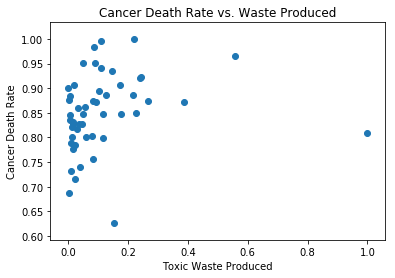

In [7]:
# Scatter plots to see if High waste produced is visibly correlated with death rates

plt.scatter(toxic_cancer['PROD._WASTE_(8.1_THRU_8.7)'],toxic_cancer['Age-adjusted Death Rate'])
plt.title('Cancer Death Rate vs. Waste Produced')
plt.xlabel('Toxic Waste Produced')
plt.ylabel('Cancer Death Rate')
plt.show()

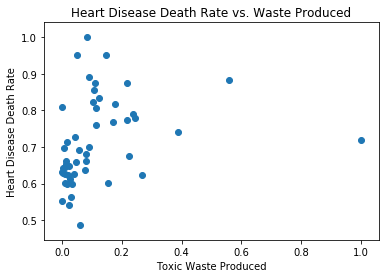

In [8]:
plt.scatter(toxic_cancer['PROD._WASTE_(8.1_THRU_8.7)'],toxic_heart['Age-adjusted Death Rate'])
plt.title('Heart Disease Death Rate vs. Waste Produced')
plt.xlabel('Toxic Waste Produced')
plt.ylabel('Heart Disease Death Rate')
plt.show()

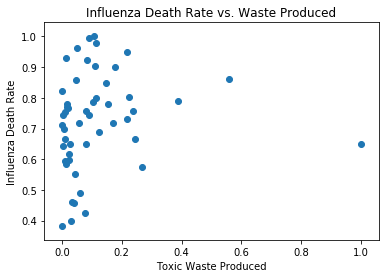

In [9]:
plt.scatter(toxic_cancer['PROD._WASTE_(8.1_THRU_8.7)'],toxic_flu['Age-adjusted Death Rate'])
plt.title('Influenza Death Rate vs. Waste Produced')
plt.xlabel('Toxic Waste Produced')
plt.ylabel('Influenza Death Rate')
plt.show()

In [10]:
locations = ToxRelData[['LATITUDE','LONGITUDE']]
weights = ToxRelData['PROD._WASTE_(8.1_THRU_8.7)']
# Configure gmaps
gmaps.configure(api_key=gkey)

# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heatmap_layer = gmaps.heatmap_layer(locations,weights=weights,point_radius=10)

# Create symbol layer
# symbol_layer = gmaps.symbol_layer(locations,fill_color='green')

# Add layers
# fig.add_layer(symbol_layer)
fig.add_layer(heatmap_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [14]:
# Import and establish Base for which classes will be constructed 
from sqlalchemy.ext.declarative import declarative_base
Base = declarative_base()

# Import modules to declare columns and column data types
from sqlalchemy import Column, Integer, String, Float

In [15]:
# Create class for toxic release data

class toxicRelease(Base):
    __tablename__ = 'ToxicRelease'
    id = Column(Integer, primary_key=True)
    state = Column(String(255))
    prod_waste = Column(Float) 

In [16]:
engine = create_engine("sqlite:///etlproject.sqlite")
conn = engine.connect()

In [17]:
# Create the ToxicRelease table within the database
Base.metadata.create_all(conn)

In [18]:
# Import the session object so that we can begin to push the toxic release data to the database

from sqlalchemy.orm import Session
session = Session(bind=engine)

In [21]:
# Change 'State' from index to column
toxic_state.reset_index(level=0, inplace=True)

0                      Alabama
1                       Alaska
2               American Somoa
3                      Arizona
4                     Arkansas
5                   California
6                     Colorado
7                  Connecticut
8                     Deleware
9         District of Columbia
10                     Florida
11                     Georgia
12                        Guam
13                      Hawaii
14                       Idaho
15                    Illinois
16                     Indiana
17                        Iowa
18                      Kansas
19                    Kentucky
20                   Louisiana
21                       Maine
22                    Maryland
23               Massachusetts
24                    Michigan
25                   Minnesota
26                 Mississippi
27                    Missouri
28                     Montana
29                    Nebraska
30                      Nevada
31               New Hampshire
32      

In [22]:
# Loop through pandas DataFrame and push toxic release data to database

for b in range(0,len(toxic_state['State'])):
    tox = toxicRelease(state=toxic_state['State'][b], prod_waste=toxic_state['PROD._WASTE_(8.1_THRU_8.7)'][b])
    session.add(tox)
    session.commit()
